# Train Custom Model Using Scikit Learn - Squat
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('squat_coords.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,s_spine_neutral_down,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,-0.313403,0.976089,0.302474,0.597096,0.656582,0.806852,0.332788,0.694722,-0.373114,0.985341
1,s_spine_neutral_down,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,-0.305247,0.975016,0.359256,0.611075,0.285869,0.773935,0.334483,0.695383,-0.373157,0.984979
2,s_spine_neutral_up,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,-0.462458,0.976983,0.493459,0.641891,0.653005,0.840647,0.369003,0.695396,-0.618573,0.986593


In [4]:
print(df['class'].unique())

['s_spine_neutral_down' 's_spine_neutral_up' 's_correct_down'
 's_correct_up' 's_feet_spread_down' 's_feet_spread_up'
 's_caved_in_knees_down' 's_caved_in_knees_up']


In [5]:
df[df['class'] == 's_correct_up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
44,s_correct_up,0.532609,0.085706,-0.563047,0.999811,0.528613,0.068749,-0.532288,0.999753,0.528110,...,-0.082207,0.969725,0.511529,0.649332,0.911253,0.861955,0.352579,0.702522,-0.277348,0.979655
45,s_correct_up,0.509986,0.080937,-0.561351,0.999886,0.509227,0.065054,-0.525186,0.999847,0.509454,...,0.107706,0.965409,0.501382,0.634013,0.821059,0.894636,0.359056,0.696438,-0.086941,0.978088
48,s_correct_up,0.536156,0.115871,-0.540090,0.999881,0.534467,0.097927,-0.511794,0.999856,0.534379,...,-0.549990,0.968655,0.513496,0.651454,0.956075,0.846784,0.358441,0.705057,-0.738255,0.981244
49,s_correct_up,0.503571,0.082825,-0.485923,0.999917,0.505458,0.067285,-0.453052,0.999893,0.506362,...,-0.246438,0.965819,0.499062,0.640127,0.827288,0.866471,0.349282,0.701368,-0.437771,0.979086
50,s_correct_up,0.497134,0.081578,-0.524982,0.999953,0.496747,0.065708,-0.488400,0.999938,0.497190,...,0.014780,0.962901,0.497767,0.632510,0.811723,0.902242,0.359015,0.696729,-0.167598,0.978218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,s_correct_up,0.564474,0.282162,-0.762410,0.999985,0.576861,0.270818,-0.754246,0.999979,0.585696,...,0.358972,0.918321,0.671181,0.694710,0.167391,0.984918,0.419833,0.688391,0.171765,0.988088
726,s_correct_up,0.533522,0.249691,-0.741068,0.999998,0.544980,0.236946,-0.733527,0.999996,0.553173,...,0.573266,0.958991,0.671440,0.695466,0.271969,0.977675,0.416612,0.689311,0.371300,0.990178
727,s_correct_up,0.533162,0.258621,-0.578735,0.999981,0.544046,0.246213,-0.583954,0.999974,0.552371,...,0.422738,0.929490,0.670720,0.695374,0.238728,0.984793,0.417562,0.689439,0.275467,0.989400
730,s_correct_up,0.553886,0.234430,-0.784332,0.999997,0.568365,0.221136,-0.756930,0.999992,0.577073,...,0.520746,0.967184,0.675319,0.693843,0.220506,0.968004,0.413328,0.687203,0.273402,0.989071


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [8]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [9]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [10]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [11]:
fit_models['rc'].predict(X_test)

array(['s_caved_in_knees_up', 's_spine_neutral_down',
       's_spine_neutral_up', 's_spine_neutral_down', 's_spine_neutral_up',
       's_correct_up', 's_feet_spread_up', 's_feet_spread_down',
       's_feet_spread_down', 's_feet_spread_down',
       's_caved_in_knees_down', 's_correct_down', 's_correct_up',
       's_caved_in_knees_up', 's_correct_down', 's_feet_spread_up',
       's_feet_spread_down', 's_caved_in_knees_down',
       's_caved_in_knees_up', 's_caved_in_knees_down',
       's_caved_in_knees_down', 's_correct_up', 's_spine_neutral_down',
       's_feet_spread_up', 's_caved_in_knees_up', 's_caved_in_knees_up',
       's_feet_spread_up', 's_spine_neutral_down', 's_correct_down',
       's_spine_neutral_down', 's_caved_in_knees_down', 's_correct_up',
       's_feet_spread_up', 's_correct_down', 's_caved_in_knees_up',
       's_caved_in_knees_up', 's_correct_down', 's_caved_in_knees_up',
       's_feet_spread_up', 's_correct_up', 's_feet_spread_down',
       's_caved_in_kne

## 3.Evaluate and Serialize Model

In [16]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(classification_report(y_test, y_pred))
    print()

                       precision    recall  f1-score   support

s_caved_in_knees_down       1.00      1.00      1.00        38
  s_caved_in_knees_up       1.00      1.00      1.00        41
       s_correct_down       1.00      1.00      1.00        30
         s_correct_up       0.98      0.98      0.98        42
   s_feet_spread_down       1.00      1.00      1.00        29
     s_feet_spread_up       1.00      1.00      1.00        36
 s_spine_neutral_down       0.94      1.00      0.97        30
   s_spine_neutral_up       0.97      0.91      0.94        33

             accuracy                           0.99       279
            macro avg       0.99      0.99      0.99       279
         weighted avg       0.99      0.99      0.99       279


                       precision    recall  f1-score   support

s_caved_in_knees_down       1.00      1.00      1.00        38
  s_caved_in_knees_up       1.00      1.00      1.00        41
       s_correct_down       0.97      0.97      0.

In [13]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9857
rc: 0.9857
rf: 0.9892
gb: 0.9857
--- precision ---
lr: 0.9859
rc: 0.9862
rf: 0.9894
gb: 0.9857
--- recall ---
lr: 0.9857
rc: 0.9857
rf: 0.9892
gb: 0.9857
--- f1-score ---
lr: 0.9856
rc: 0.9857
rf: 0.9893
gb: 0.9857


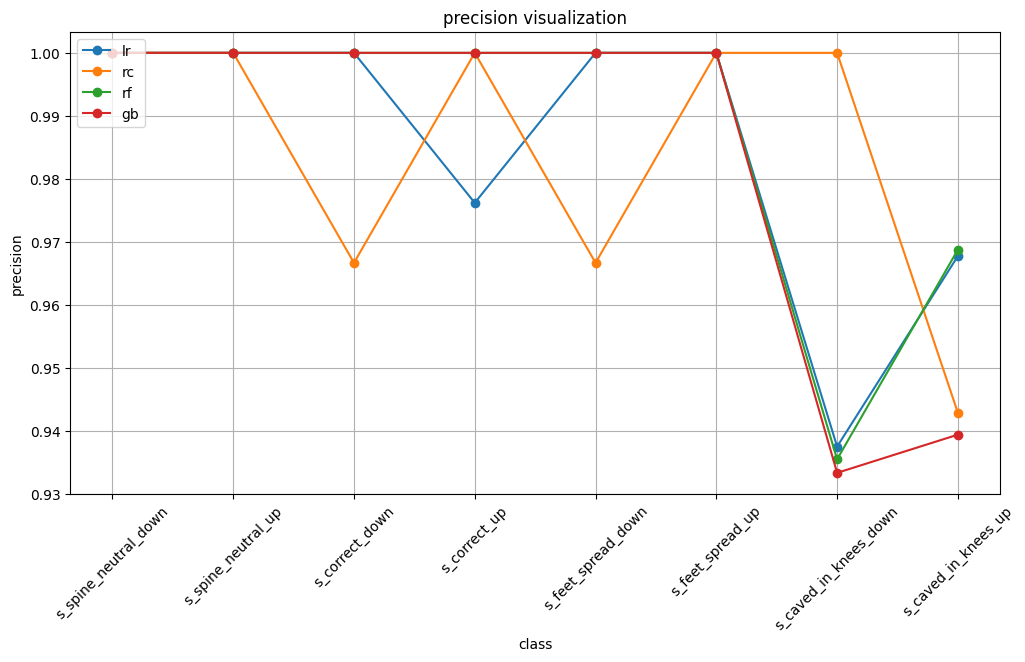

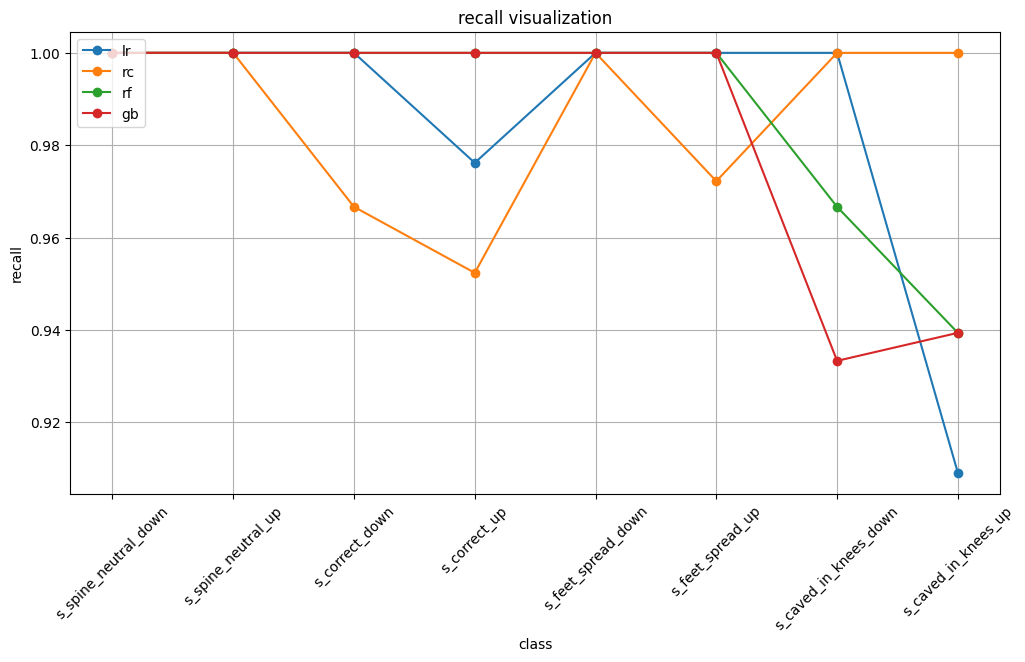

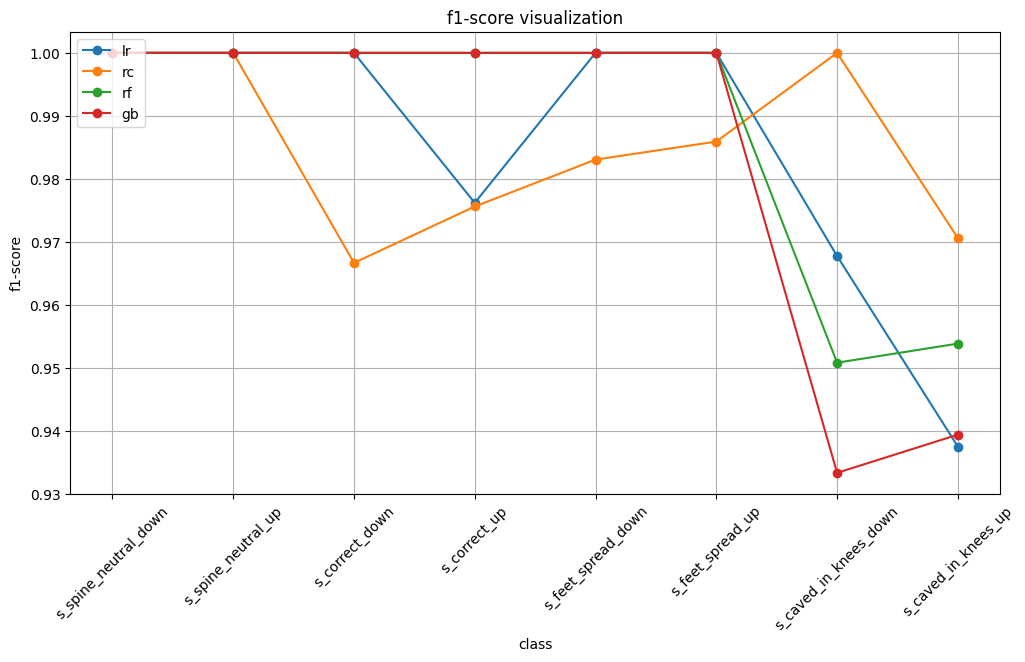

In [17]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  
    predictions[algorithm] = y_pred  

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [15]:
with open('squat.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)